In [1]:
# here we check properties of the visp data which is used as an example dataset. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import anndata as ad


from txtox.utils import get_adata, get_paths

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

In [2]:
path = get_paths()["data_root"] + "VISp.h5ad"
adata = ad.read_h5ad(path)
# std values for xyz are a guide for how large the errors are with the ML model.
adata.obs[["x_ccf", "y_ccf", "z_ccf"]].describe()

/home/rohan/miniconda3/envs/txtox-torch-gpu/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,x_ccf,y_ccf,z_ccf
count,61884.000000,61884.000000,61884.000000
mean,9.117019,1.228012,5.593278
std,0.545051,0.368035,2.599154
min,7.686228,0.364732,2.068275
25%,8.691917,0.944278,3.089846
50%,9.146589,1.209929,4.019522
75%,9.480291,1.502350,8.241007
max,10.205951,2.302520,9.322983


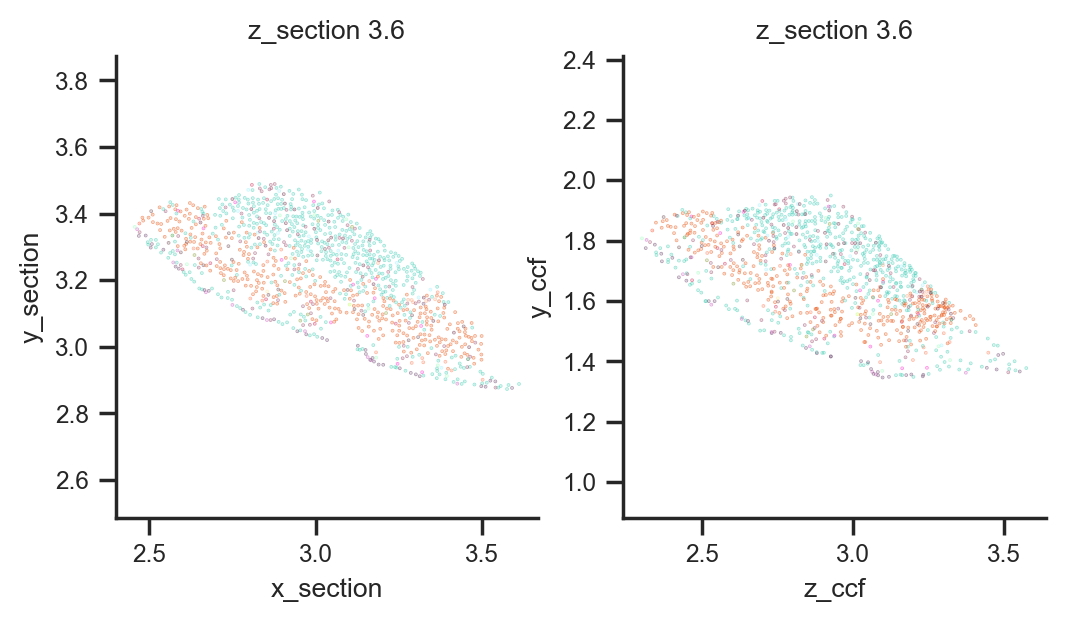

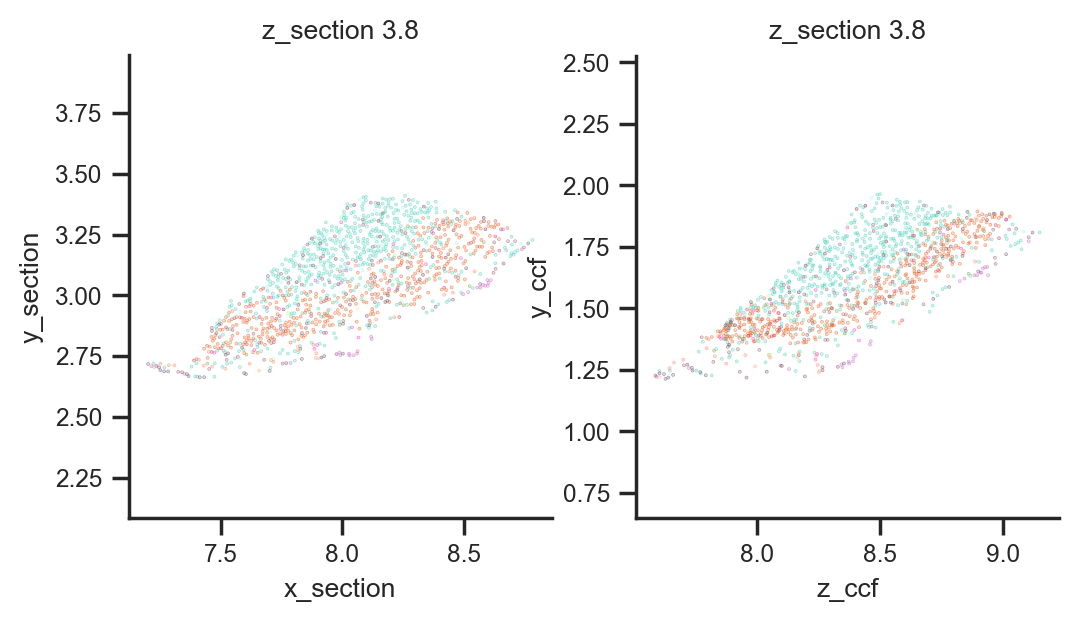

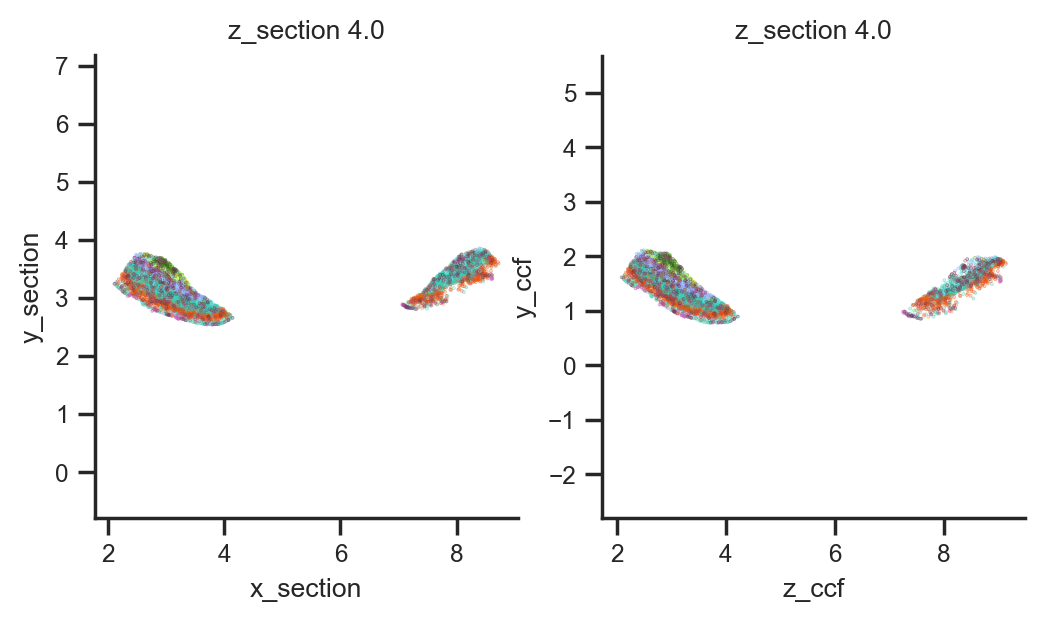

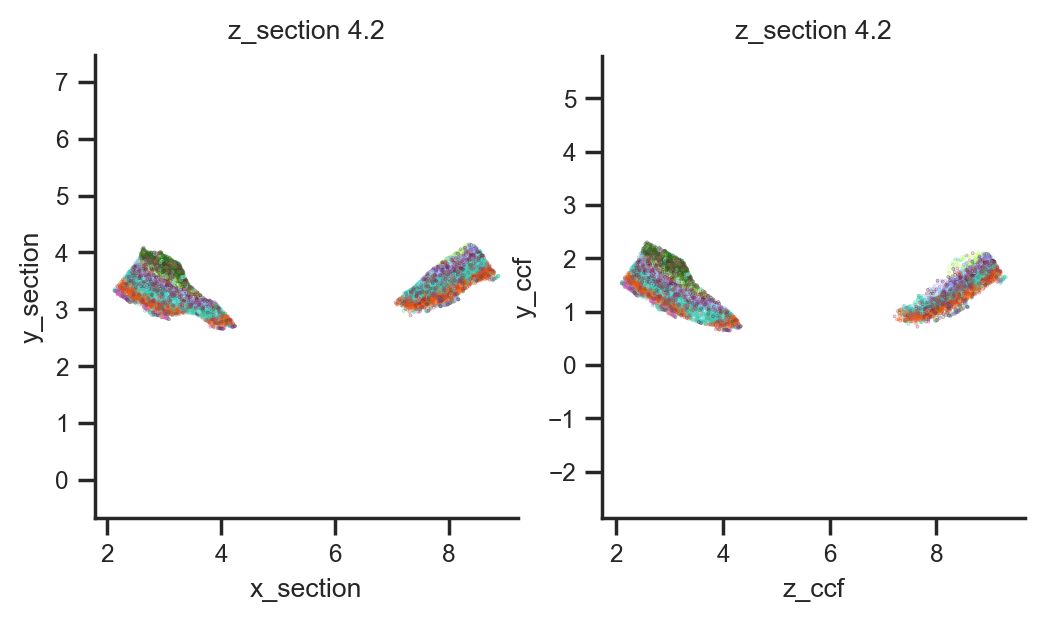

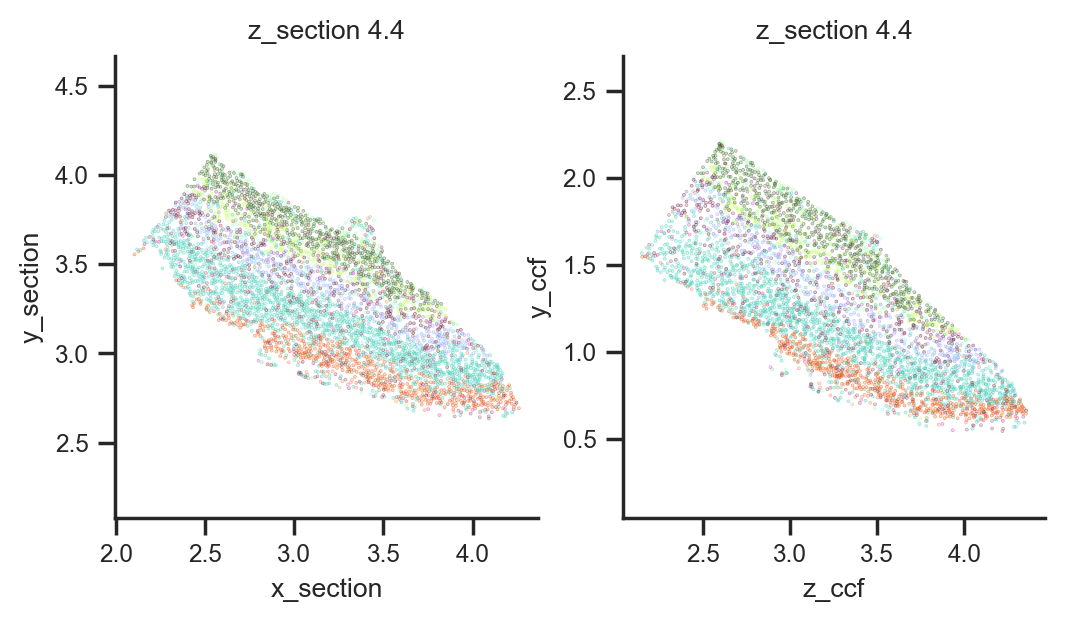

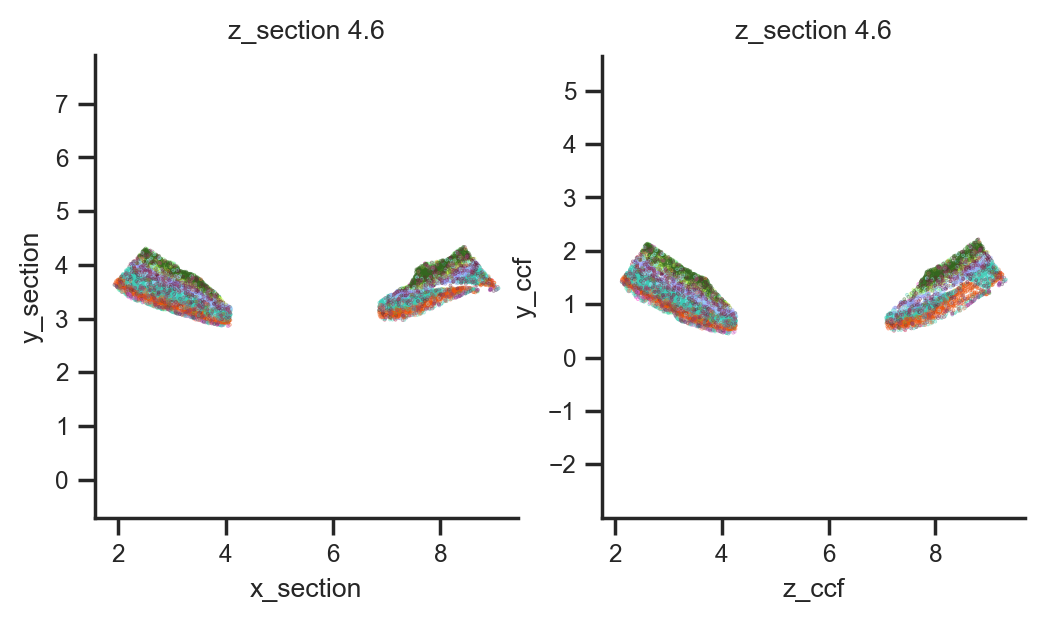

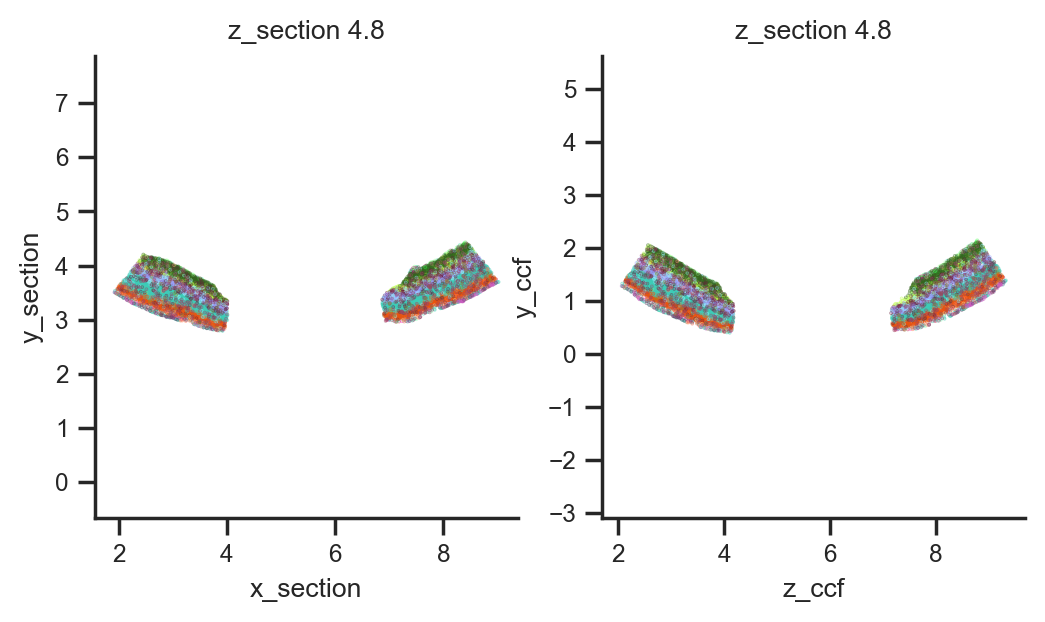

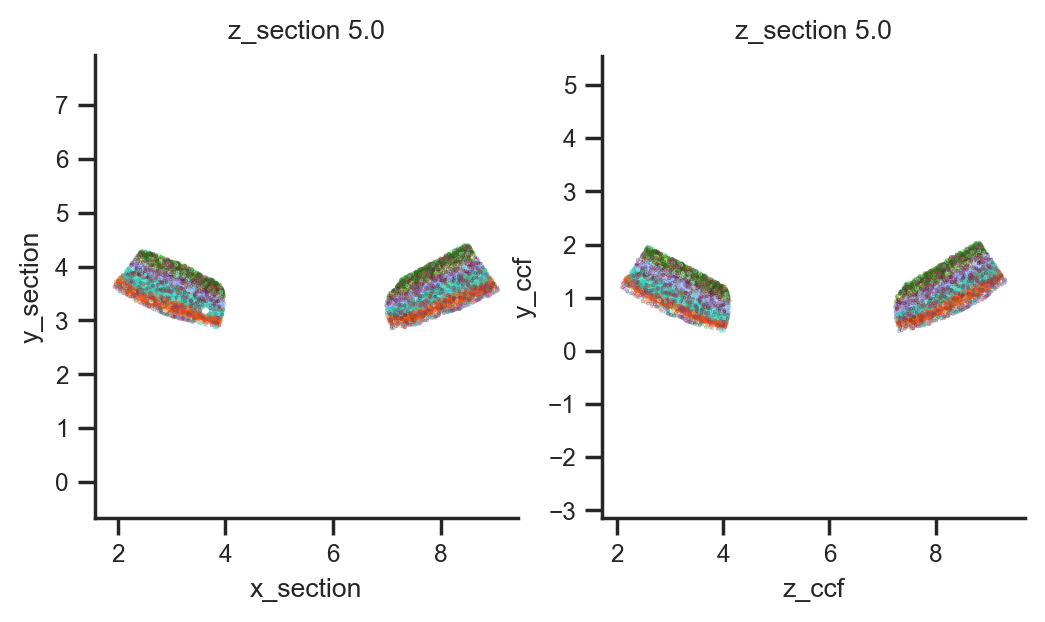

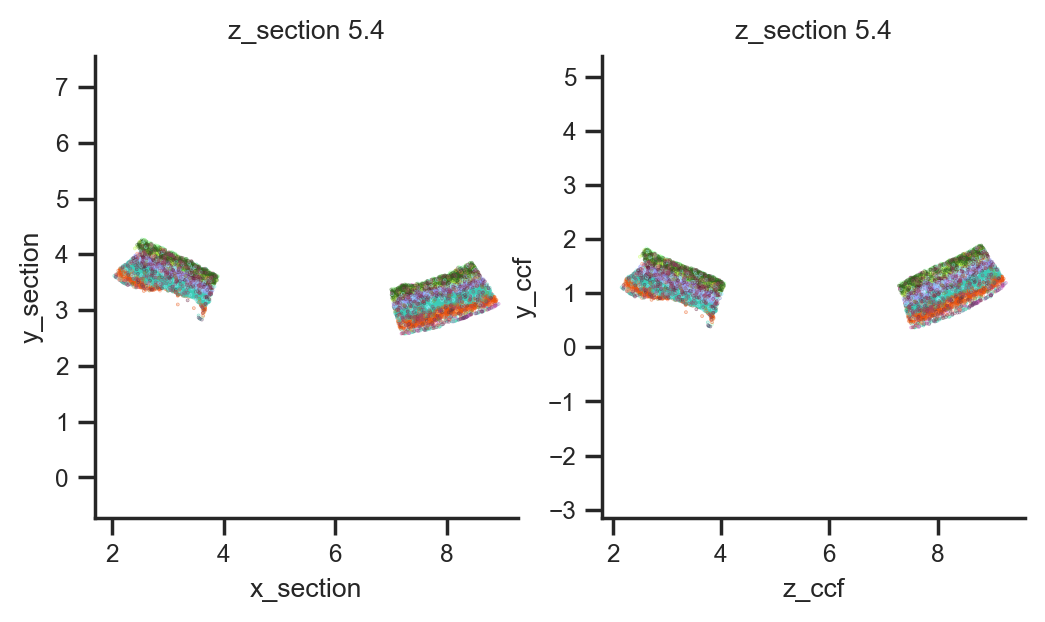

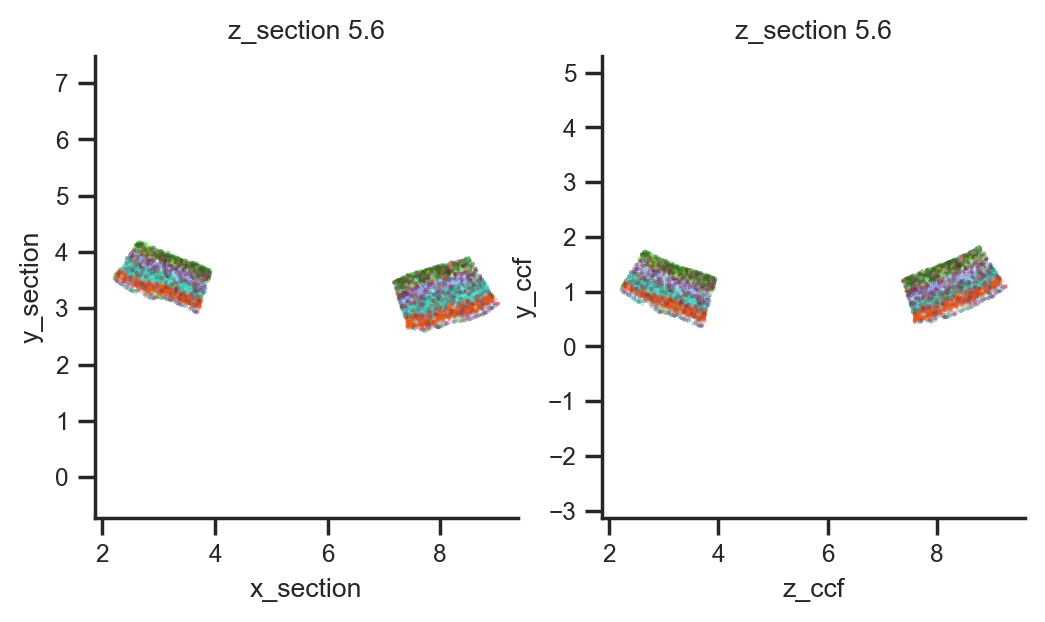

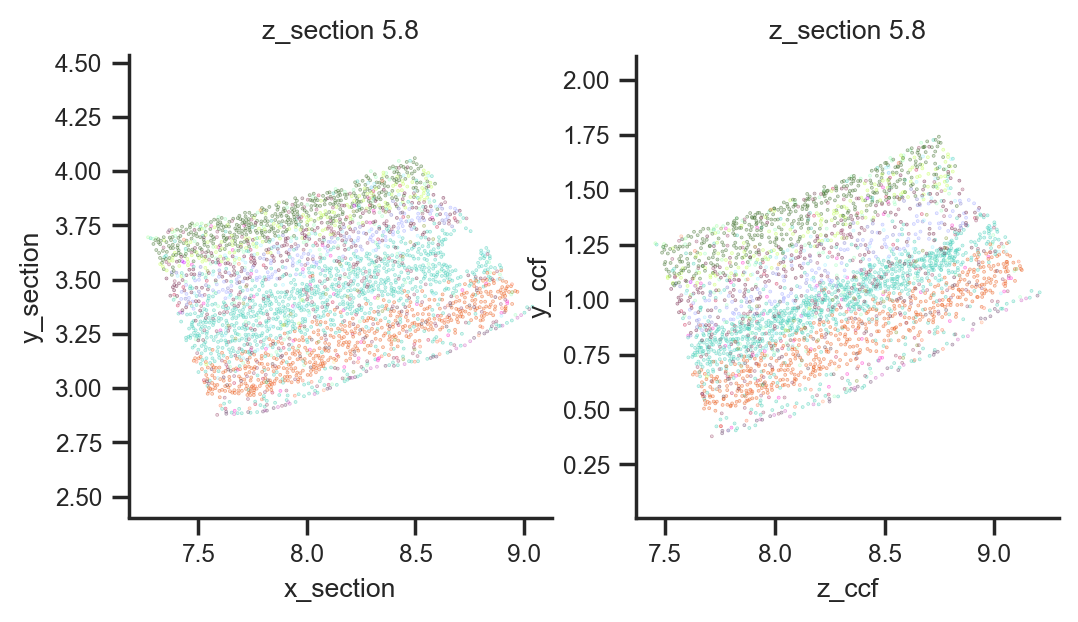

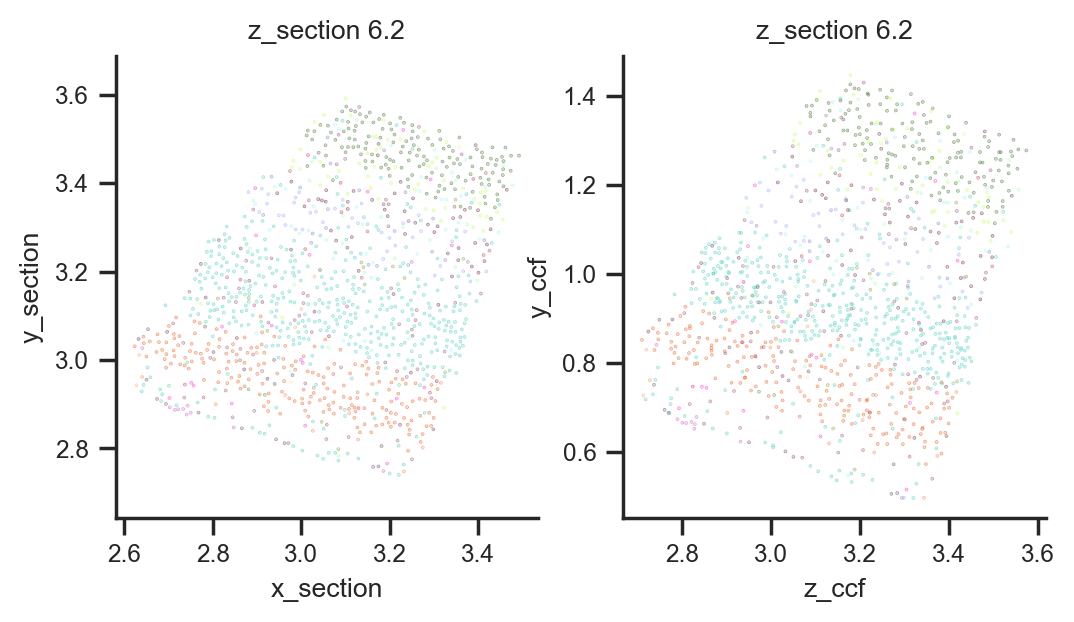

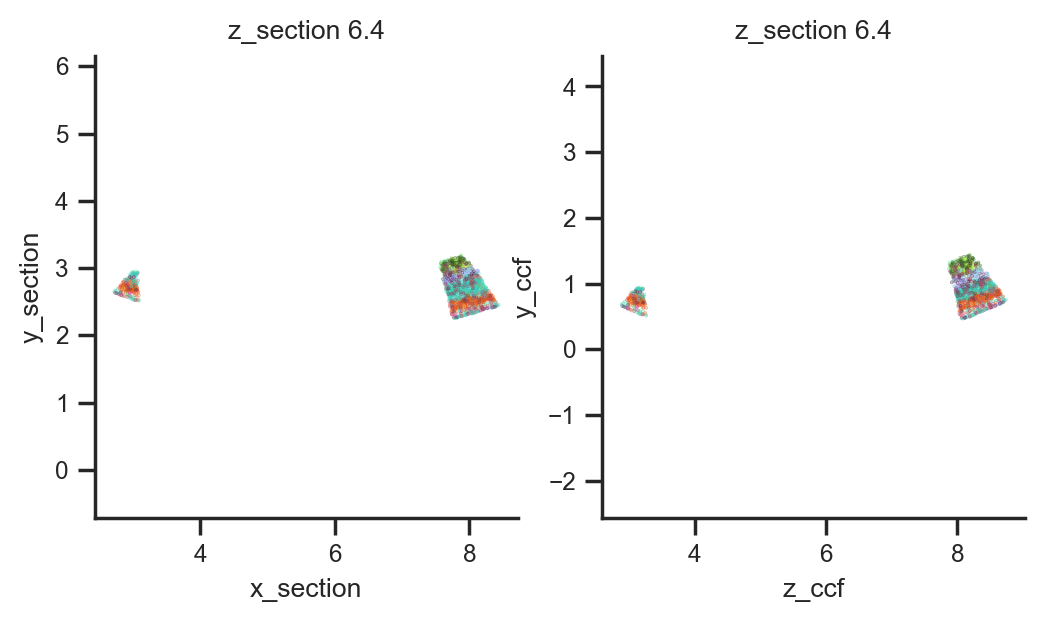

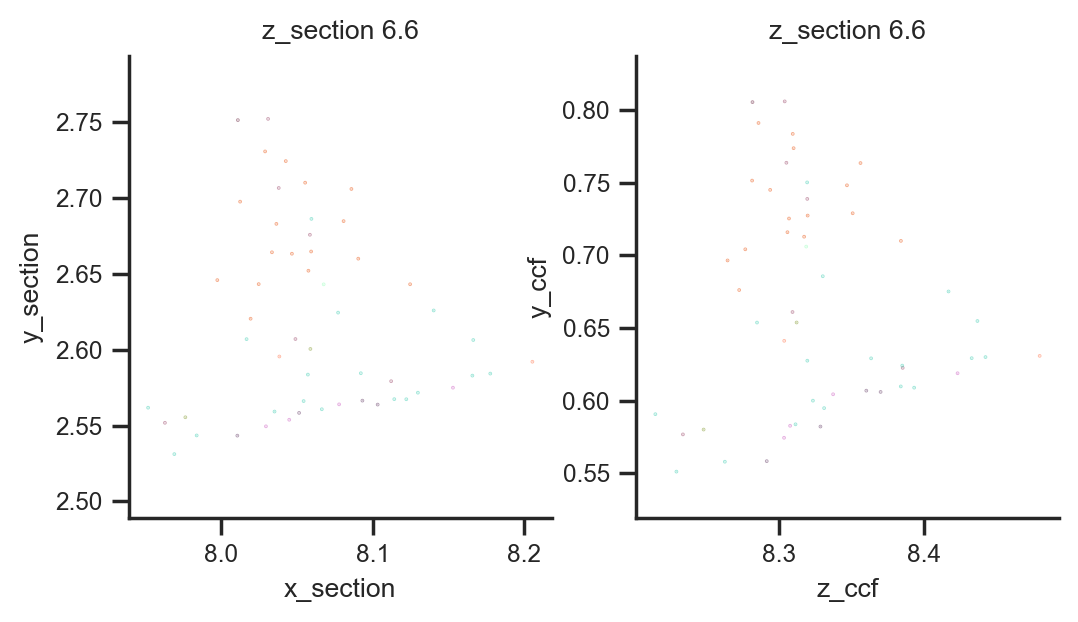

In [3]:
# adata.obs["x_section"] for z_section = section
# plot ccf co-ordinates instead

for section in np.sort(adata.obs["z_section"].unique()):
    ind = adata.obs["z_section"] == section
    f, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].scatter(
        adata.obs["x_section"][ind],
        adata.obs["y_section"][ind],
        c=adata.obs["subclass_color"][ind],
        s=0.1,
        alpha=0.5,
        label=section,
    )
    ax[0].axis('equal')
    ax[0].set(xlabel="x_section", ylabel="y_section", title=f"z_section {section:0.1f}")

    ax[1].scatter(
        adata.obs["z_ccf"][ind],
        adata.obs["y_ccf"][ind],
        c=adata.obs["subclass_color"][ind],
        s=0.1,
        alpha=0.5,
        label=section,
    )
    ax[1].axis('equal')
    ax[1].set(xlabel="z_ccf", ylabel="y_ccf", title=f"z_section {section:0.1f}")
    plt.show()
